In [1]:
import pandas as pd

In [2]:
X_train = pd.read_csv("train_values.csv")  # Features for training
y_train = pd.read_csv("train_labels.csv")  # Labels for training
X_test = pd.read_csv("test_values.csv")    # Features for testing

In [3]:
X_train.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_agriculture  \
0                      t               r  ...                             0   
1                      o               r  ...                             0   
2                      t               r  ...                             0   
3                      t               r  ...                             0   
4                      t               r  ...                             0   

  has_secondary_use_hotel has_secondary_use_rental  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   

  has_secondary_use_institution has_secondary_use_school  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   has_secondary_use_industry  has_secondary_use_health_post  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   has_secondary_use_gov_office  has_secondary_use_use_police  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   has_secondary_use_other  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 39 columns]

In [4]:
y_train.head()

building_id  damage_grade
0       802906             3
1        28830             2
2        94947             3
3       590882             2
4       201944             3

In [5]:
X_test.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       300051              17             596           11307   
1        99355               6             141           11987   
2       890251              22              19           10044   
3       745817              26              39             633   
4       421793              17             289            7970   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    3   20                7                  6   
1                    2   25               13                  5   
2                    2    5                4                  5   
3                    1    0               19                  3   
4                    3   15                8                  7   

  land_surface_condition foundation_type  ... has_secondary_use_agriculture  \
0                      t               r  ...                             0   
1                      t               r  ...                             1   
2                      t               r  ...                             0   
3                      t               r  ...                             0   
4                      t               r  ...                             0   

  has_secondary_use_hotel has_secondary_use_rental  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        1   
4                       0                        0   

  has_secondary_use_institution has_secondary_use_school  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   has_secondary_use_industry  has_secondary_use_health_post  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   has_secondary_use_gov_office  has_secondary_use_use_police  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   has_secondary_use_other  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 39 columns]

In [6]:
#keeping only target variable in the test_lables
y_train = y_train.drop(columns=["building_id"])

In [7]:
y_train.head()

damage_grade
0             3
1             2
2             3
3             2
4             3

In [8]:
#checking null vlaues
print(X_train.isnull().sum())

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

#### encoding

In [9]:
# ENCODING
categorical_cols = X_train.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')


In [10]:
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True).astype(int)

In [11]:
X_train

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1                         2   10                8                  7   
2                         2   10                5                  5   
3                         2   10                6                  5   
4                         3   30                8                  9   
...                     ...  ...              ...                ...   
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                                  1                                    1   
1                                  0                                    1   
2                                  0                                    1   
3                                  0                                    1   
4                                  1                                    0   
...                              ...                                  ...   
260596                             0                                    1   
260597                             0                                    1   
260598                             0                                    1   
260599                             0                                    0   
260600                             0                                    1   

        ...  plan_configuration_f  plan_configuration_m  plan_configuration_n  \
0       ...                     0                     0                     0   
1       ...                     0                     0                     0   
2       ...                     0                     0                     0   
3       ...                     0                     0                     0   
4       ...                     0                     0                     0   
...     ...                   ...                   ...                   ...   
260596  ...                     0                     0                     0   
260597  ...                     0                     0                     0   
260598  ...                     0                     0                     0   
260599  ...                     0                     0                     0   
260600  ...                     0                     0                     0   

        plan_configuration_o  plan_configuration_q  plan_configuration_s  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4           

#### feature scaling / standardization training set

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [13]:
X_train_scaled

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0          0.910312       -0.983414       -0.518705        1.629055   
1         -1.631438       -0.734459        0.481998       -0.945017   
2         -1.414337        0.883744       -0.819158        0.744612   
3          0.214112        1.008221       -0.685893        1.216589   
4         -1.063003       -0.361028       -1.381296       -1.308119   
...             ...             ...             ...             ...   
260596     0.535096        1.381653        1.536007       -1.271644   
260597     0.472212        0.385835        0.033741       -1.151250   
260598     0.252300        0.385835       -1.575137        0.522472   
260599    -1.228939        1.506130       -1.604213       -1.208568   
260600     0.728690        0.883744       -1.676903        0.779715   

        count_floors_pre_eq       age  area_percentage  height_percentage  \
0                 -0.178274  0.047100        -0.459460          -0.226419   
1                 -0.178274 -0.224765        -0.004110           0.816109   
2                 -0.178274 -0.224765        -0.687135          -0.226419   
3                 -0.178274 -0.224765        -0.459460          -0.226419   
4                  1.195989  0.047100        -0.004110           1.858636   
...                     ...       ...              ...                ...   
260596            -1.552536  0.386932        -0.459460          -1.268946   
260597            -0.178274 -0.360698        -0.459460          -0.226419   
260598             1.195989  0.386932        -0.459460           0.816109   
260599            -0.178274 -0.224765         1.361941           0.294845   
260600             1.195989 -0.224765        -0.231785           0.294845   

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                           3.206391                             0.558971   
1                          -0.311877                             0.558971   
2                          -0.311877                             0.558971   
3                          -0.311877                             0.558971   
4                           3.206391                            -1.789003   
...                              ...                                  ...   
260596                     -0.311877                             0.558971   
260597                     -0.311877                             0.558971   
260598                     -0.311877                             0.558971   
260599                     -0.311877                            -1.789003   
260600                     -0.311877                             0.558971   

        ...  plan_configuration_f  plan_configuration_m  plan_configuration_n  \
0       ...             -0.009188             -0.013287             -0.012076   
1       ...             -0.009188             -0.013287             -0.012076   
2       ...             -0.009188             -0.013287             -0.012076   
3       ...             -0.009188             -0.013287             -0.012076   
4       ...             -0.009188             -0.013287             -0.012076   
...     ...                   ...                   ...                   ...   
260596  ...             -0.009188             -0.013287             -0.012076   
260597  ...             -0.009188             -0.013287             -0.012076   
260598  ...             -0.009188             -0.013287             -0.012076   
260599  ...             -0.009188             -0.013287             -0.012076   
260600  ...             -0.009188             -0.013287             -0.012076   

        plan_configuration_o  plan_configuration_q  plan_configuration_s  \
0                  -0.024708             -0.149431             -0.036462   
1                  -0.024708             -0.149431             -0.036462   
2                  -0.024708             -0.149431             -0.036462   
3                  -0.024708

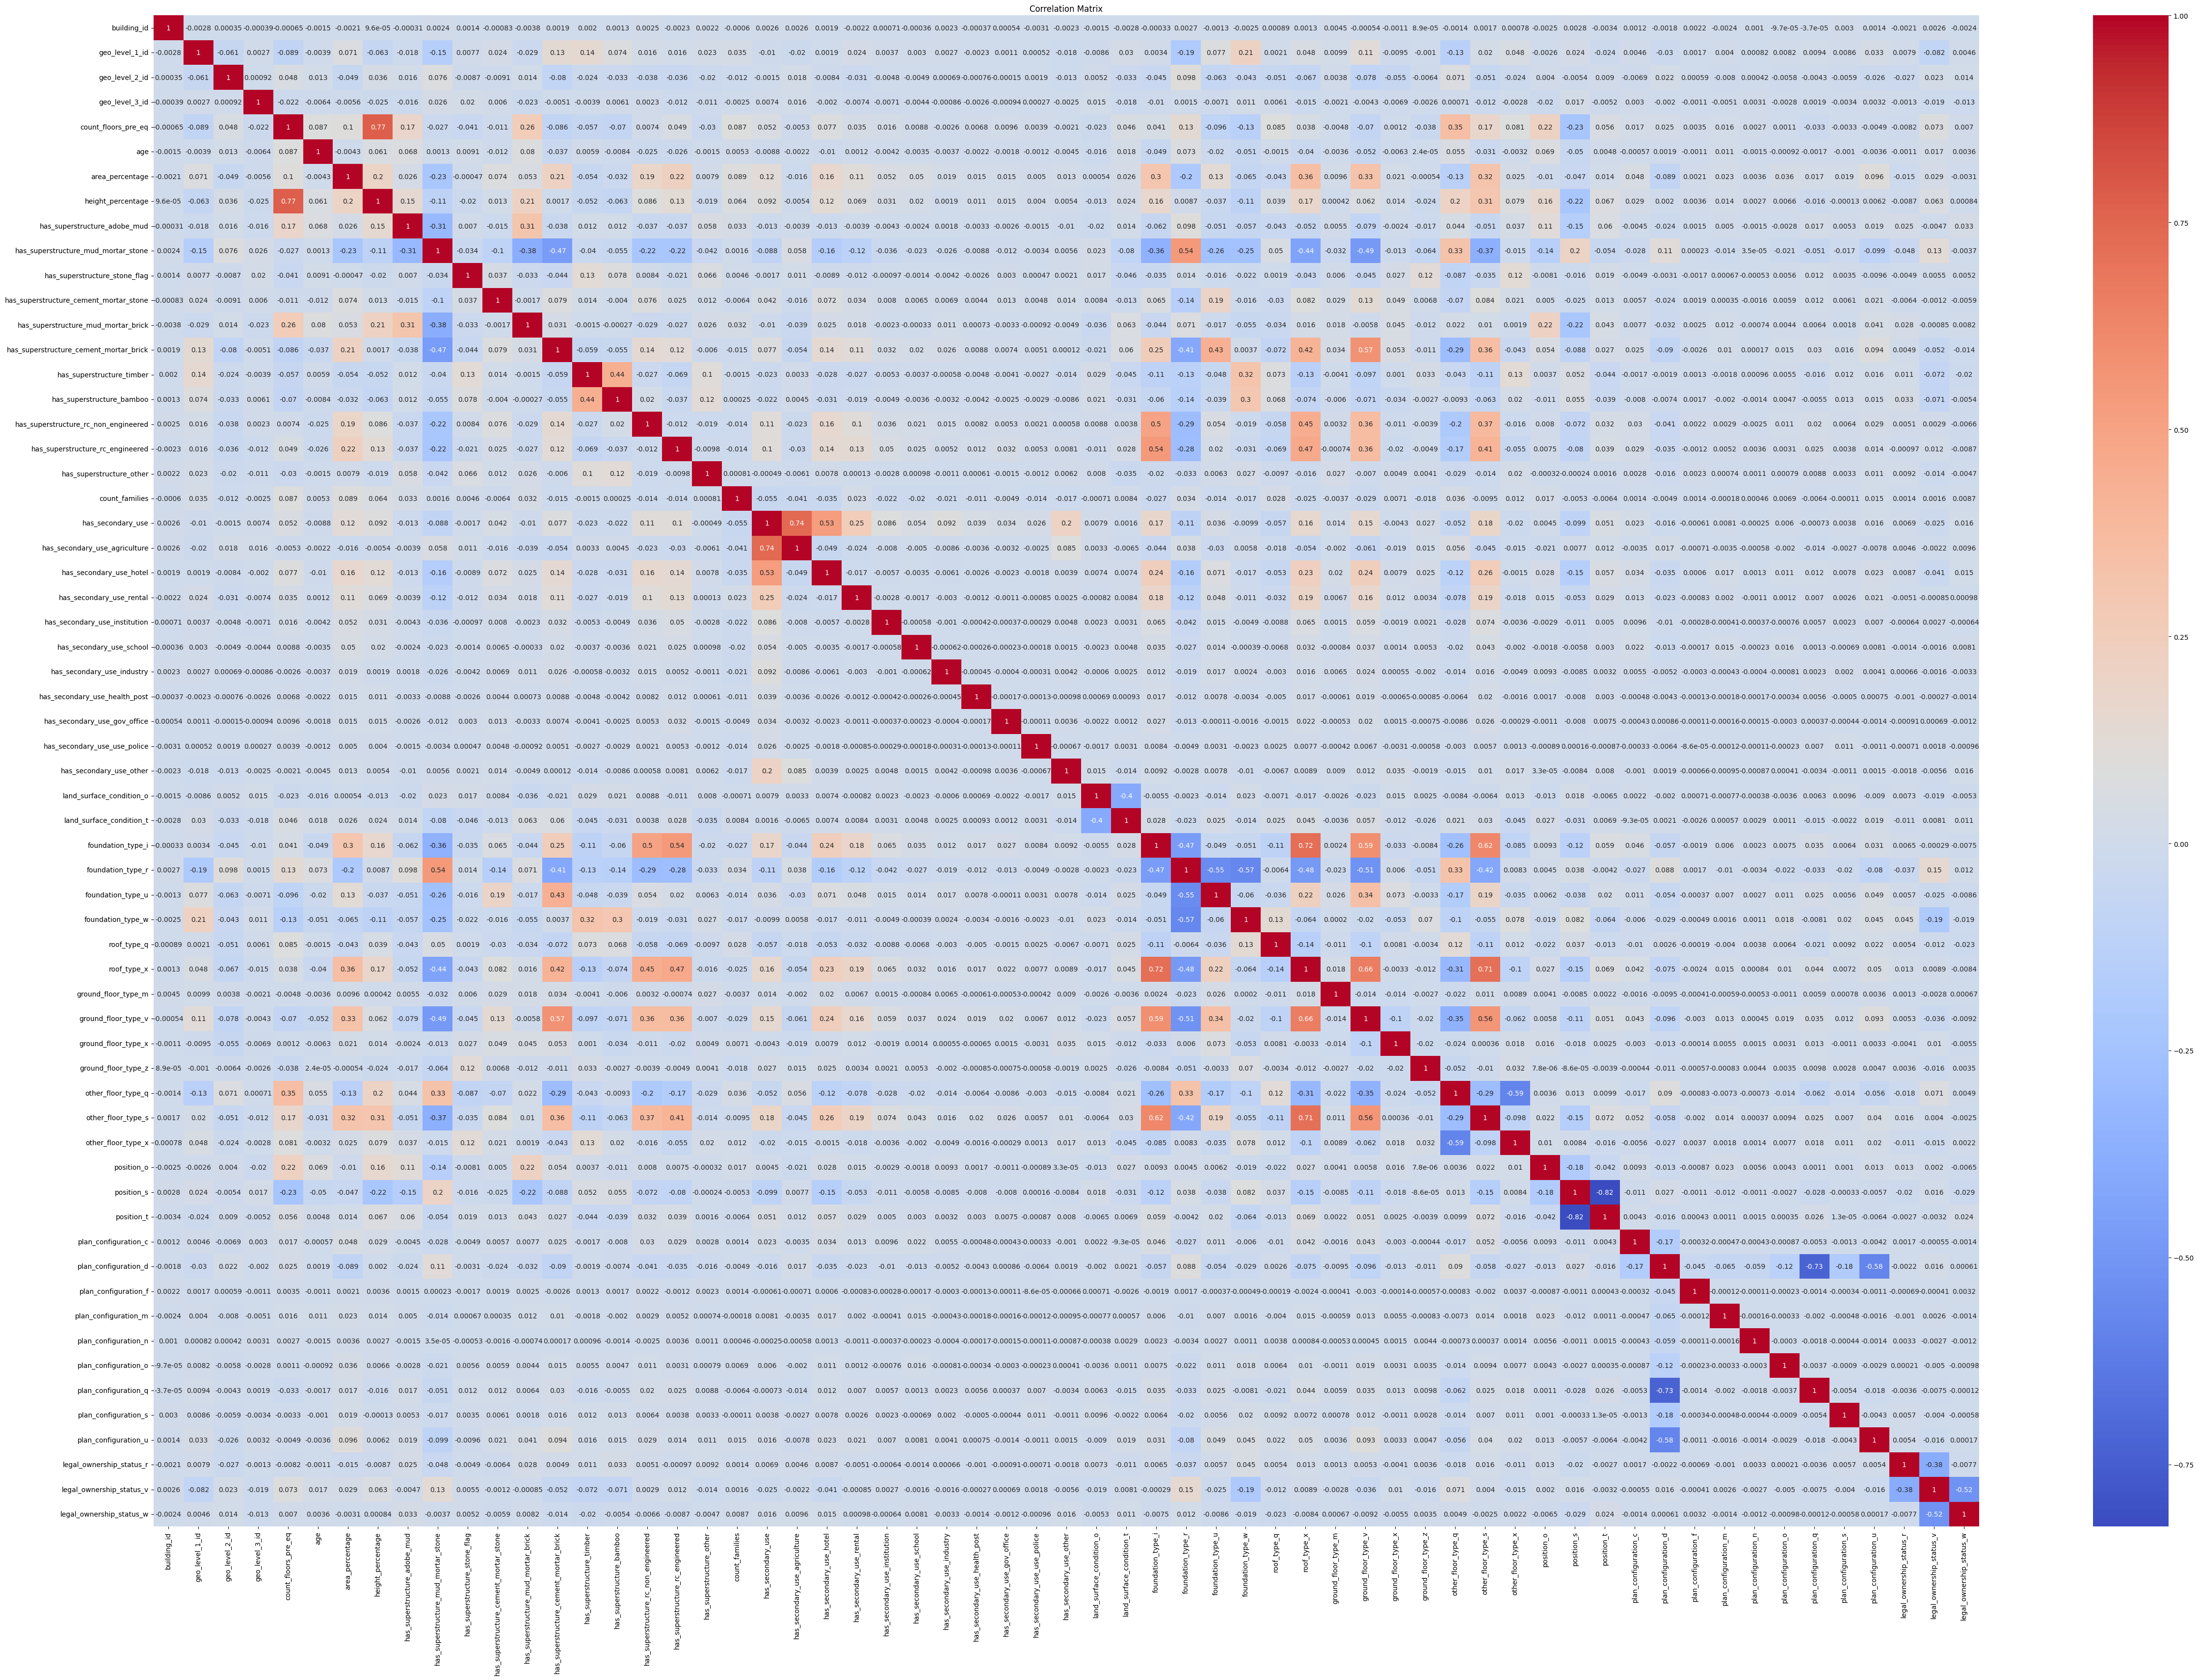

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(60, 40))
sns.heatmap(pd.DataFrame(X_train_scaled).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


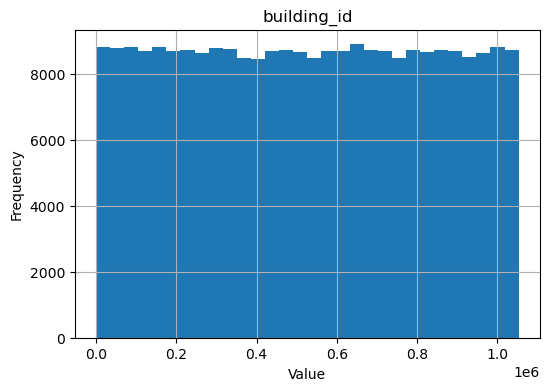

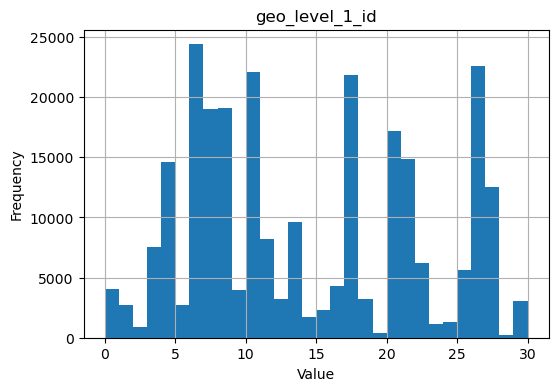

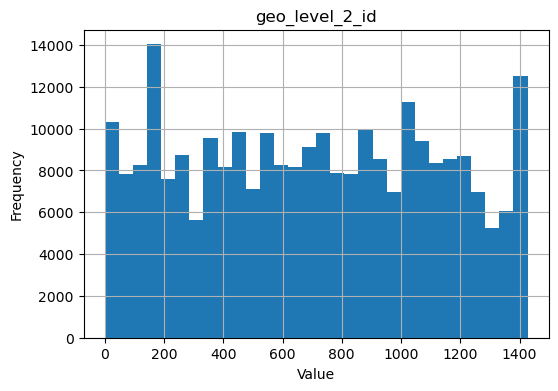

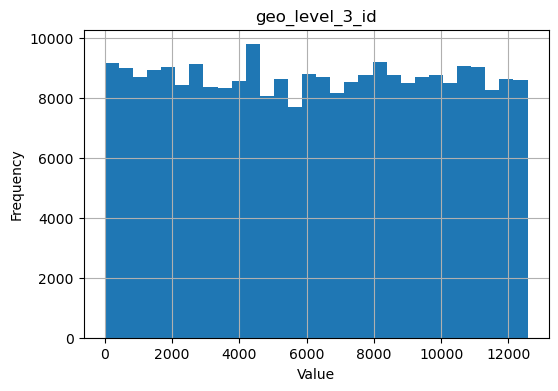

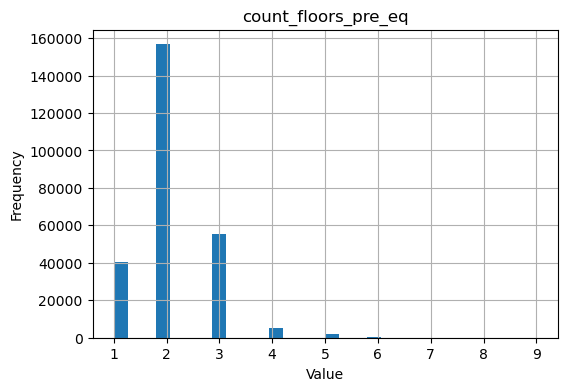

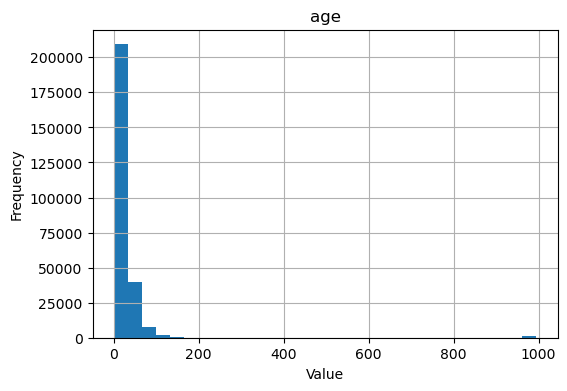

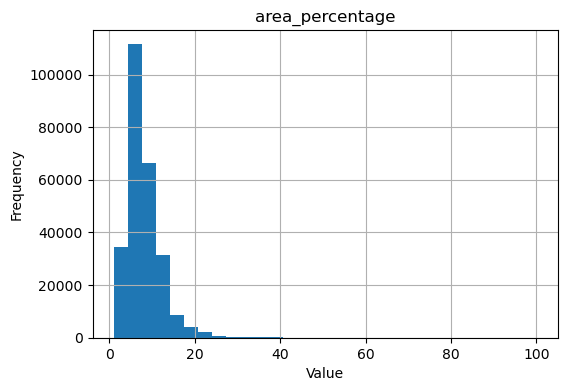

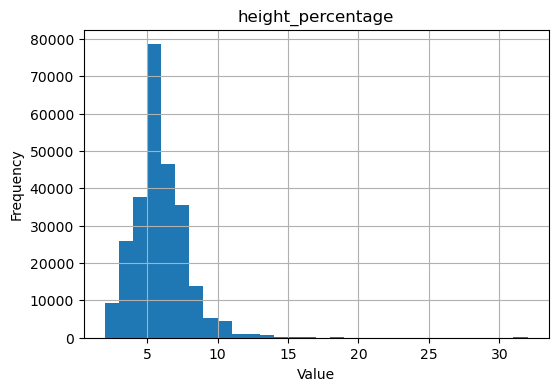

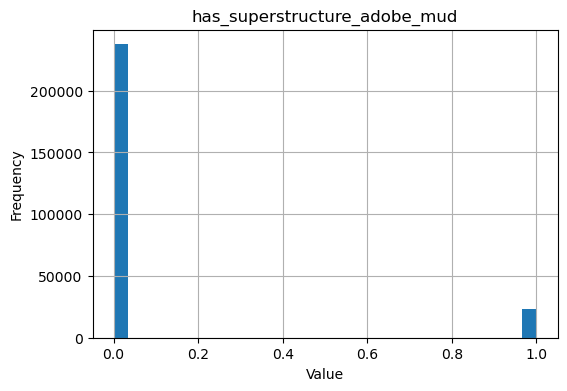

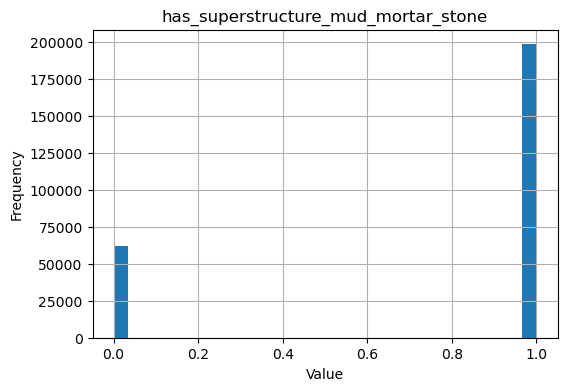

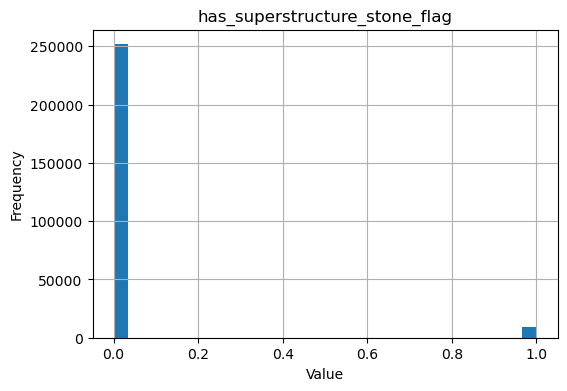

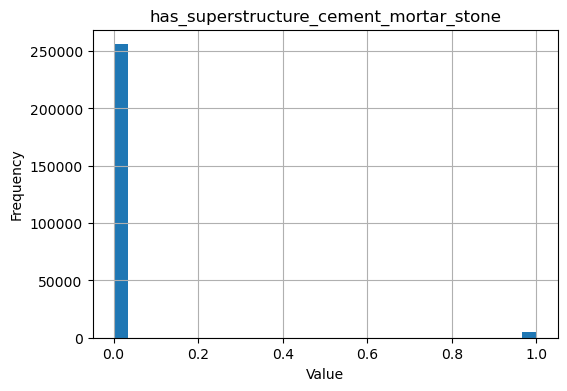

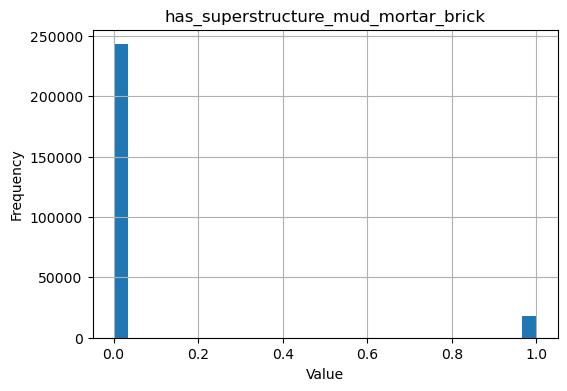

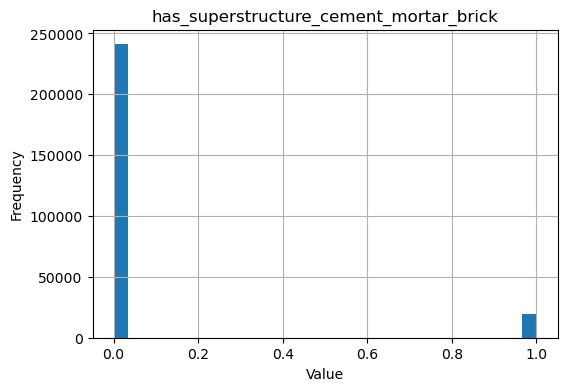

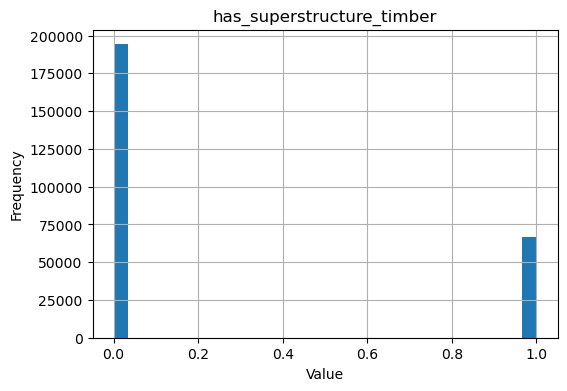

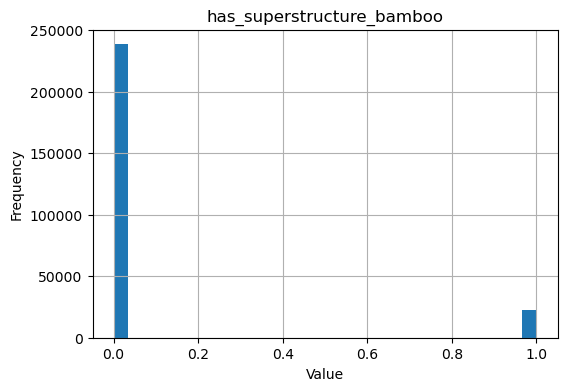

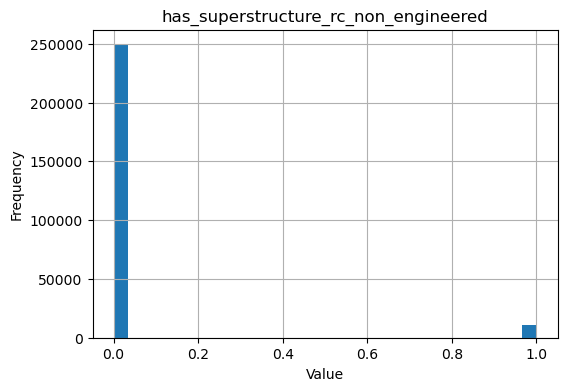

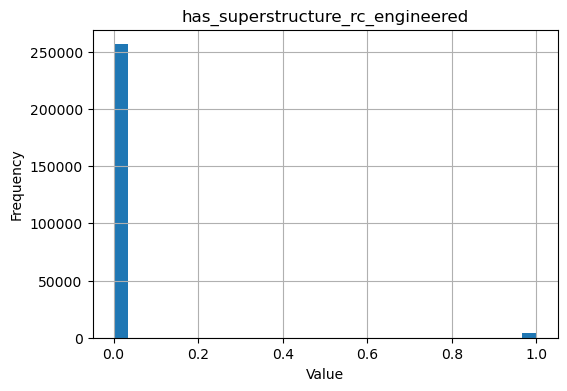

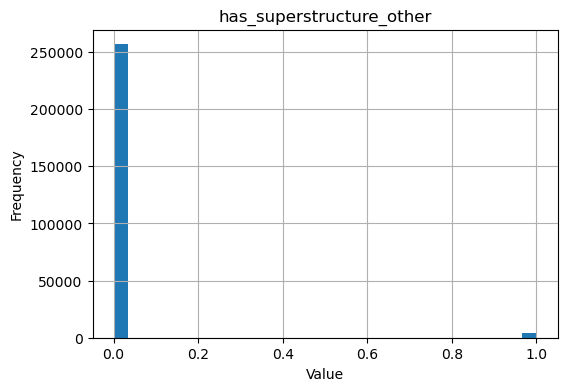

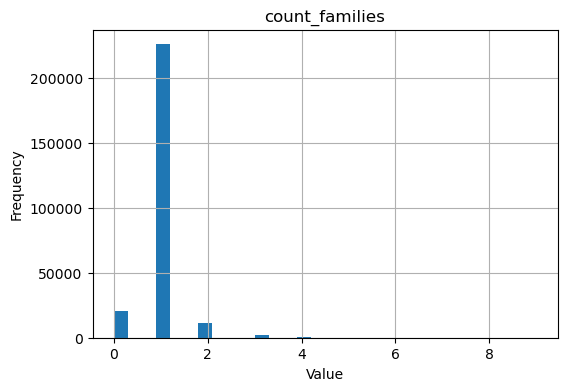

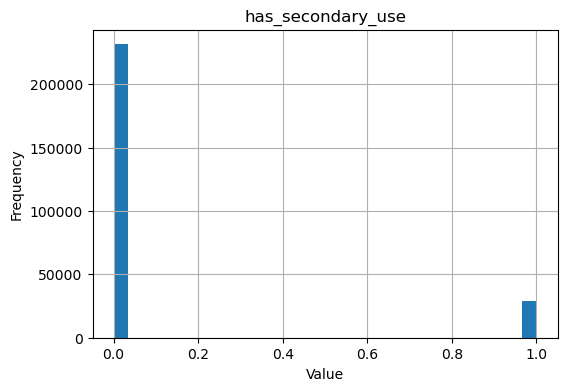

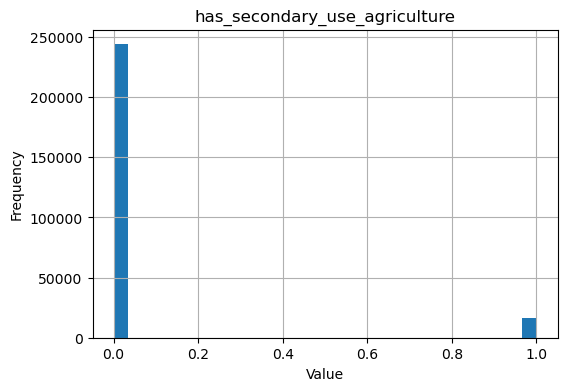

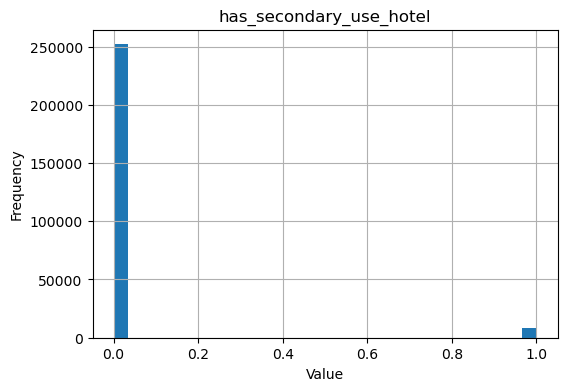

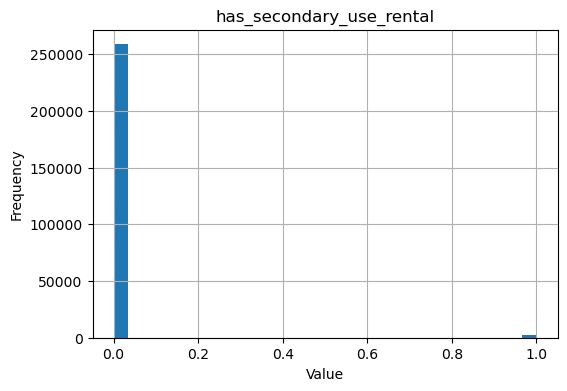

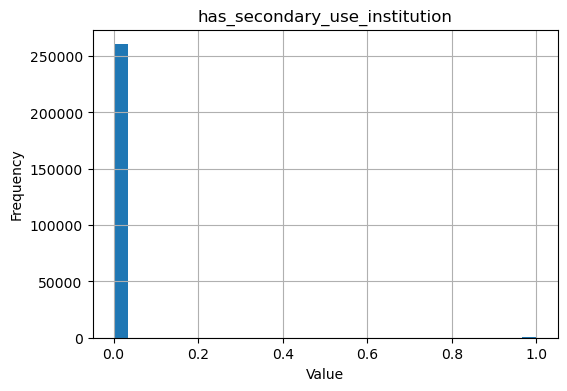

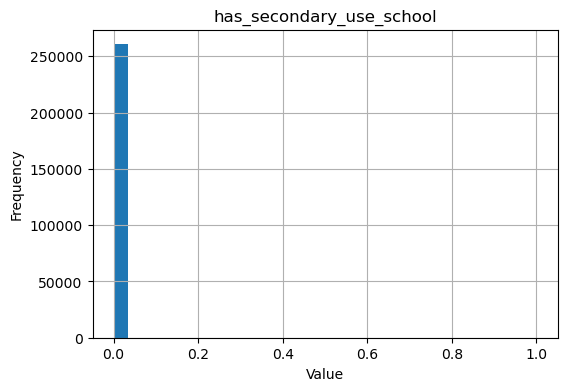

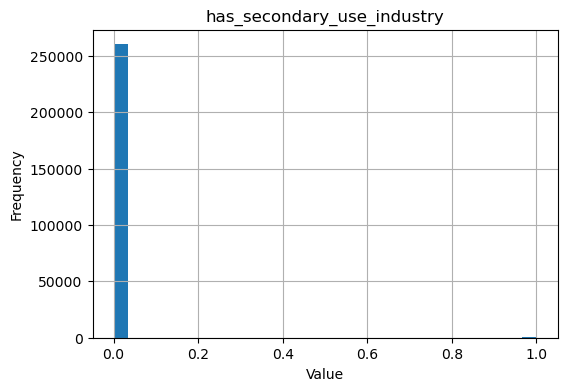

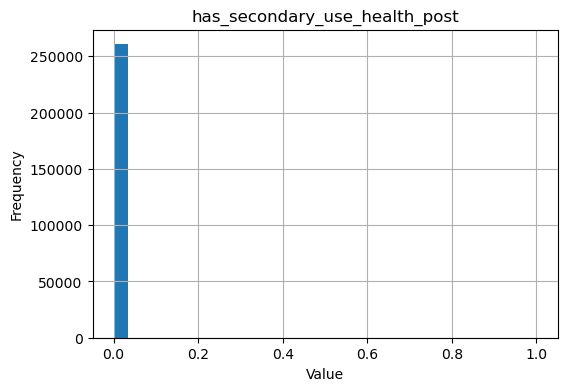

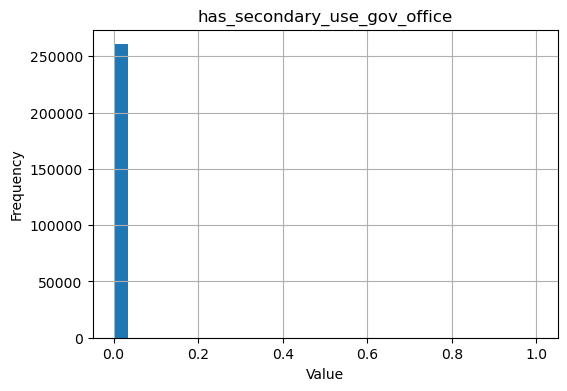

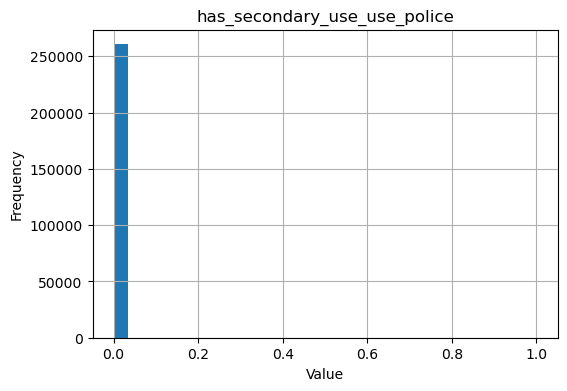

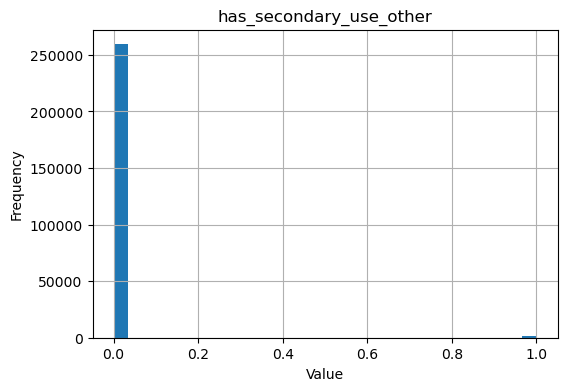

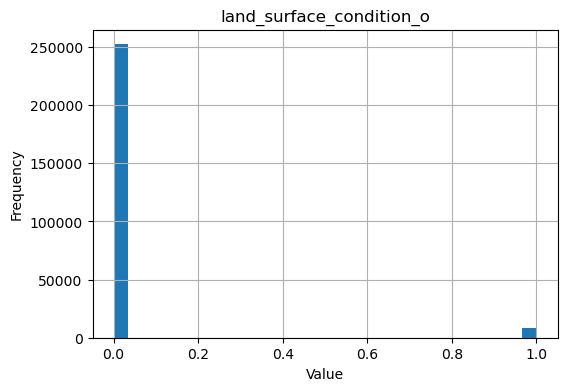

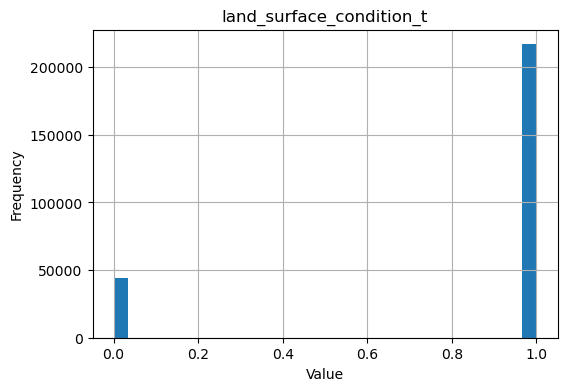

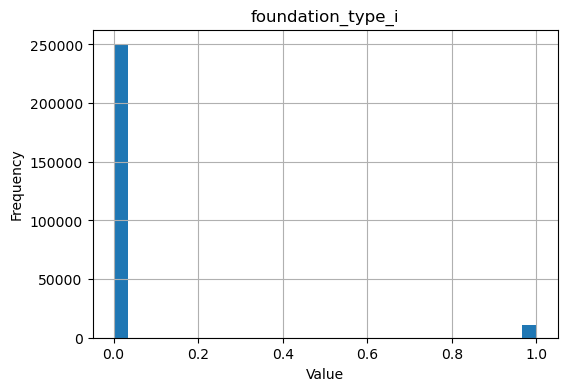

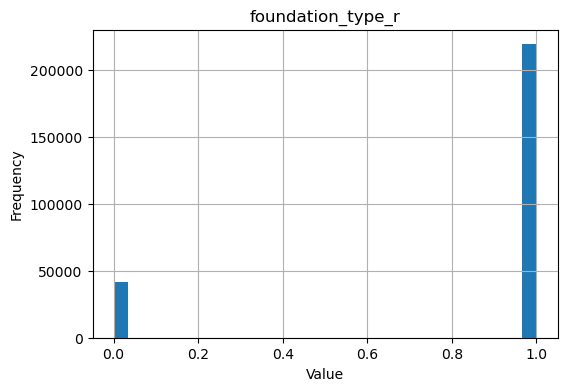

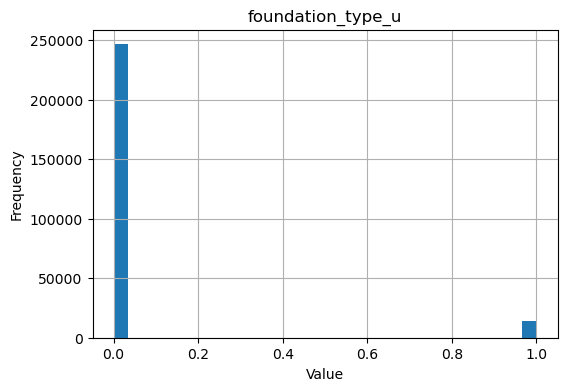

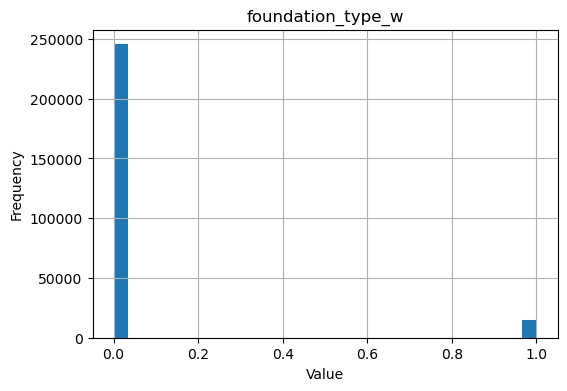

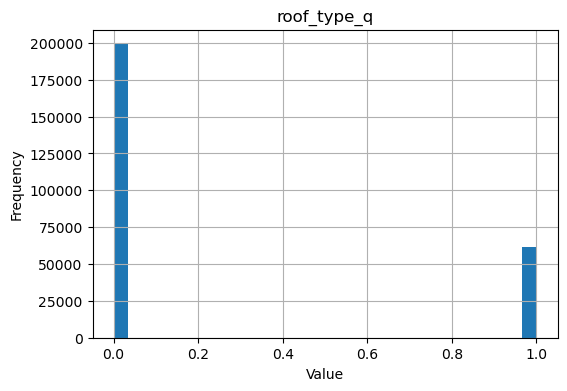

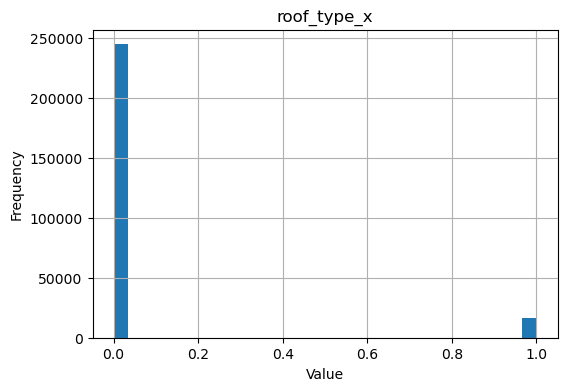

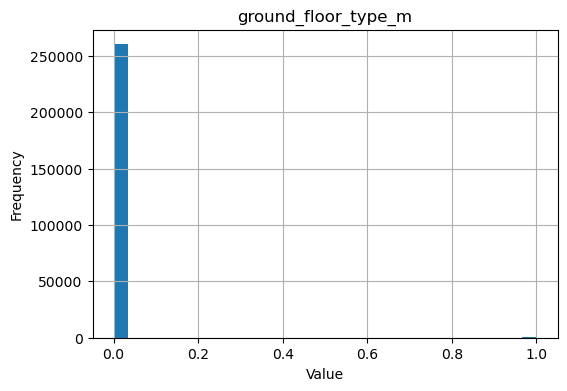

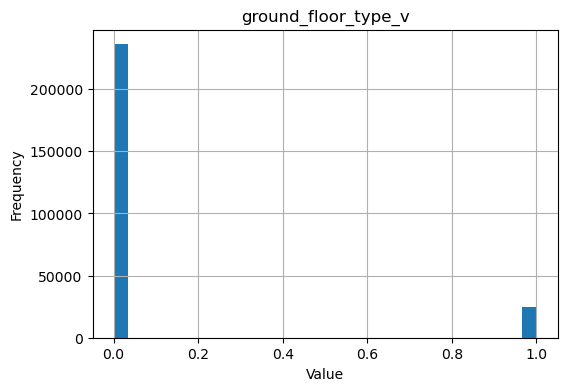

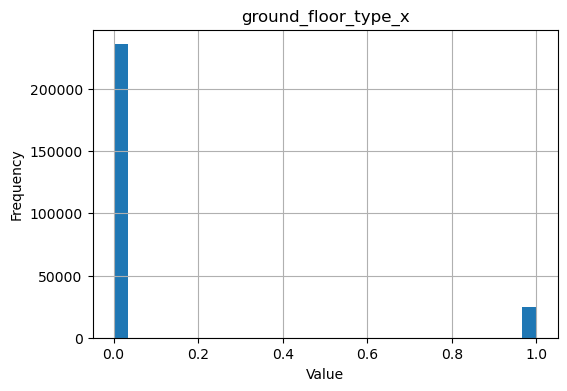

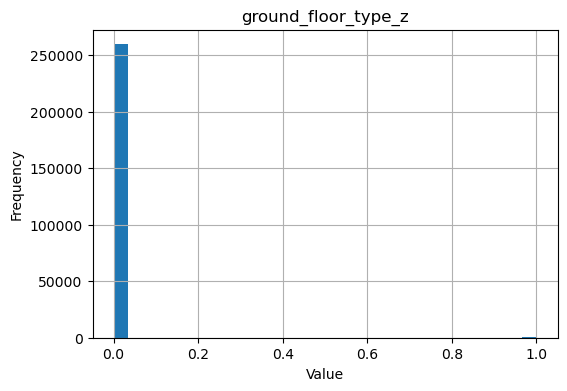

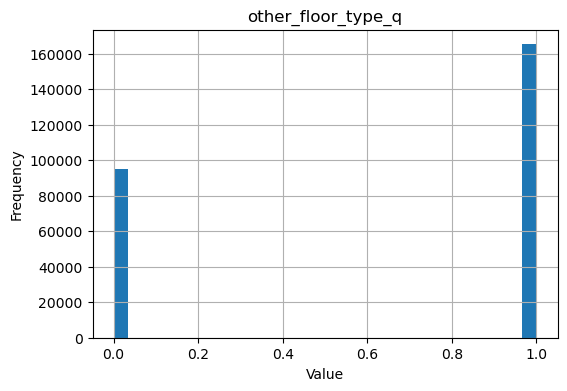

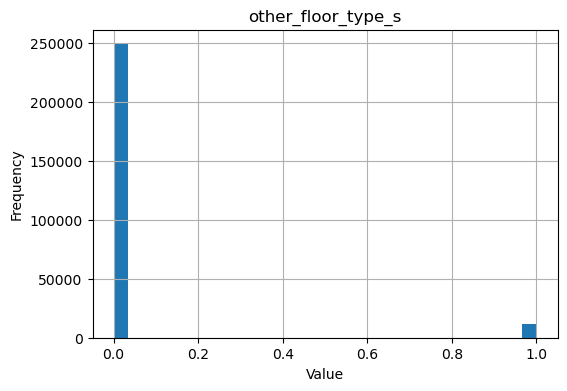

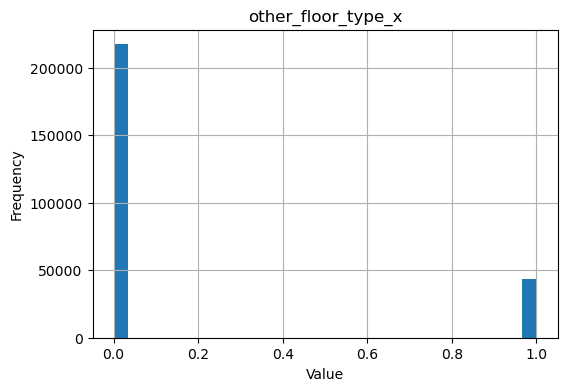

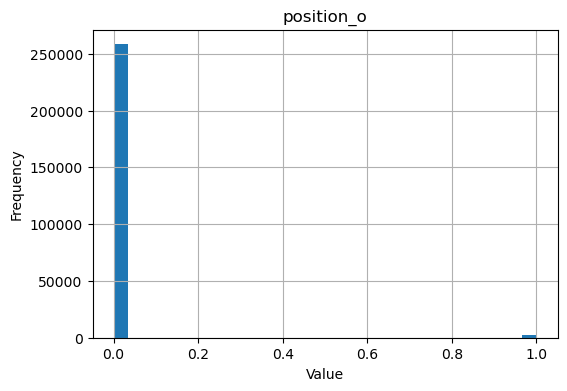

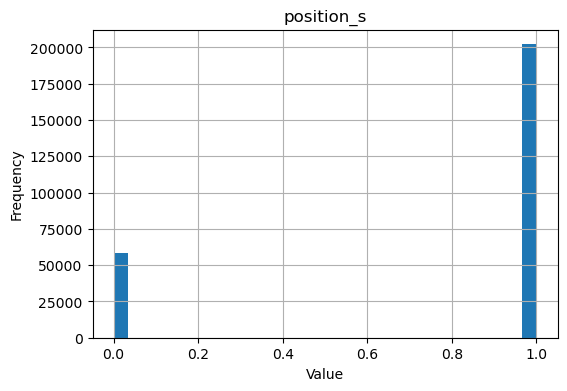

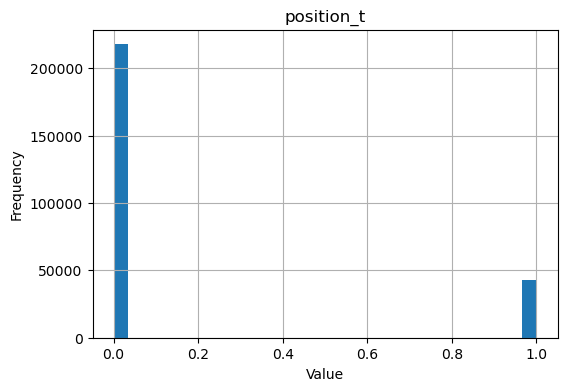

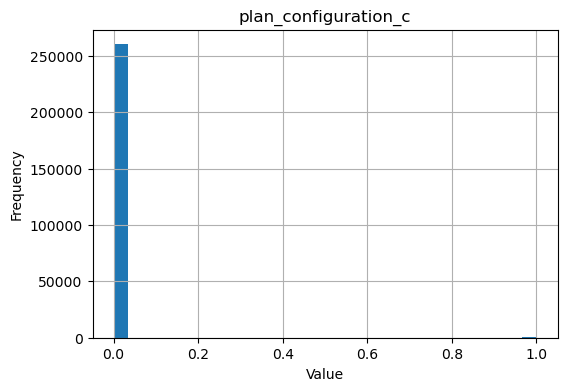

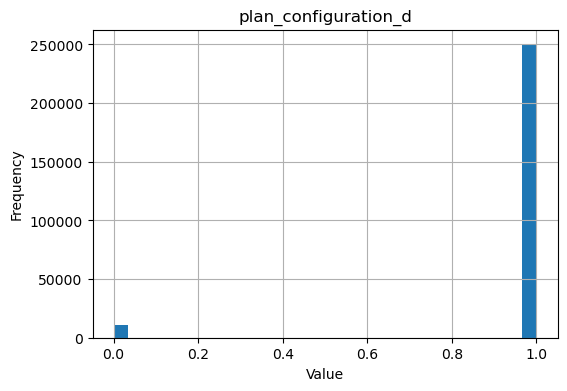

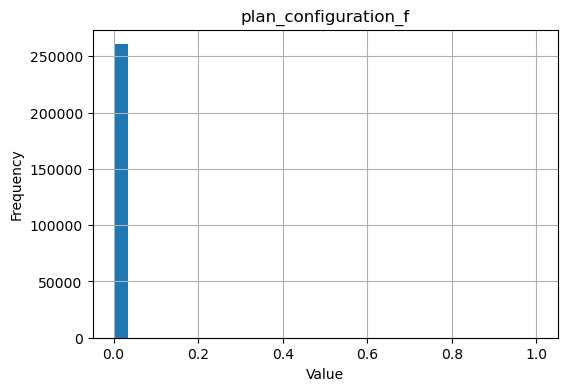

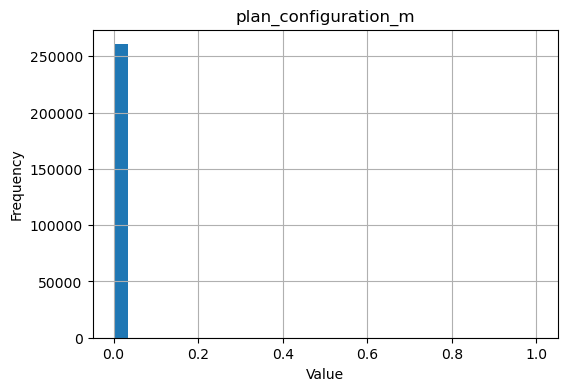

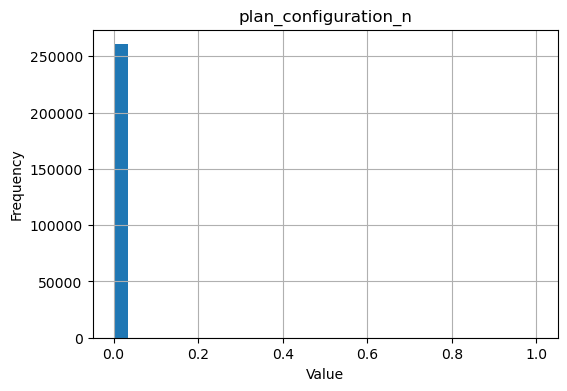

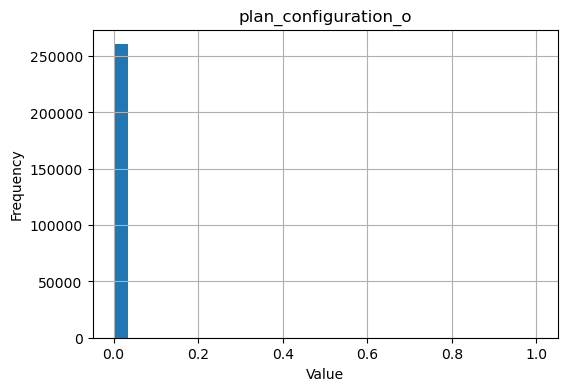

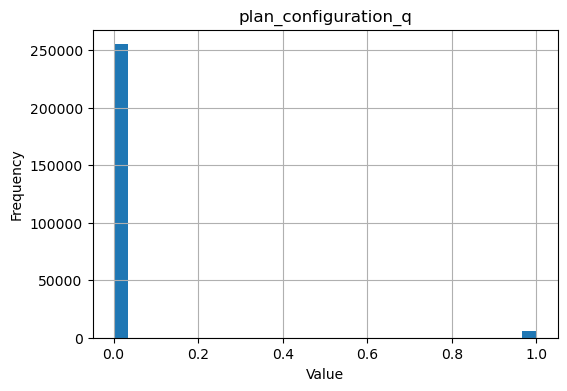

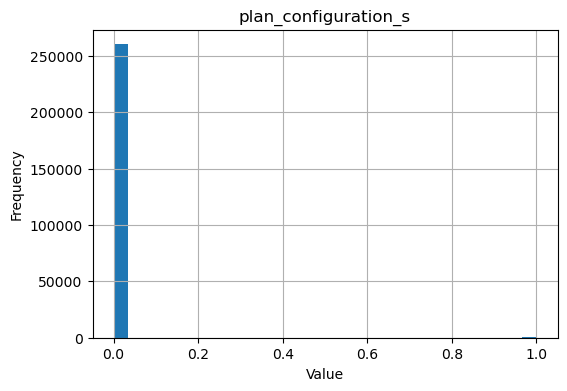

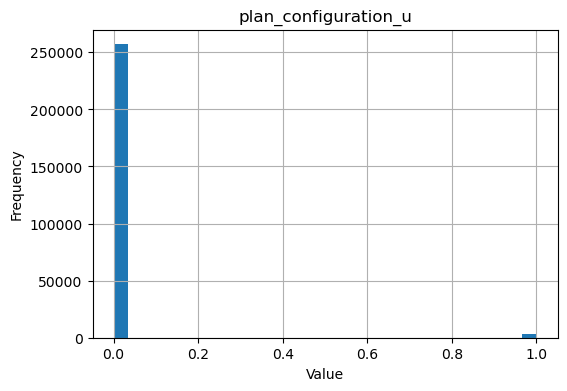

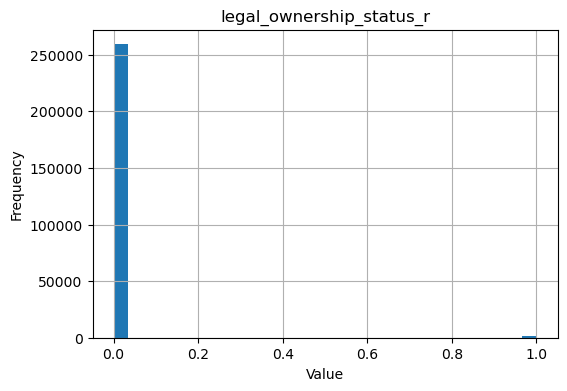

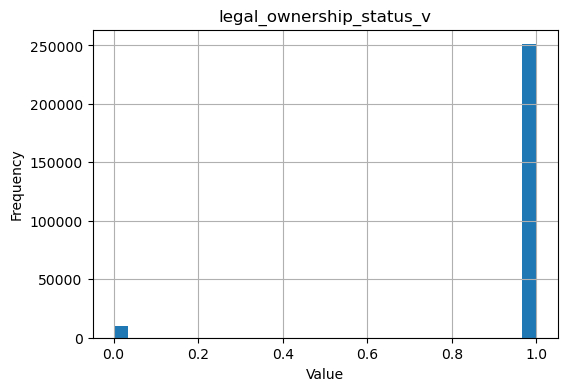

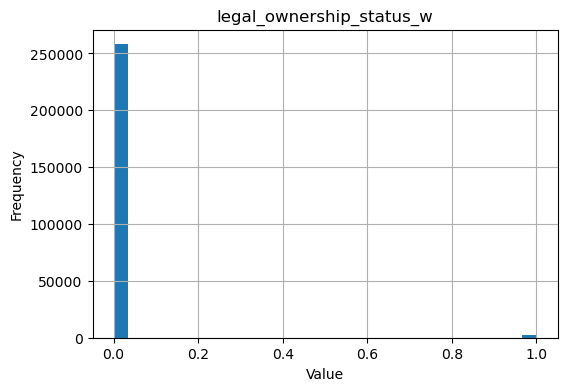

In [14]:
import matplotlib.pyplot as plt

for column in X_train.columns:
    plt.figure(figsize=(6, 4))  # Set individual figure size
    X_train[column].hist(bins=30)
    plt.title(column)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()


#### pca to reduce features

In [15]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)



In [18]:
X_train_pca

array([[-0.89070353,  1.97690089,  0.77572877, ...,  2.05117694,
         0.692138  , -0.21120725],
       [-1.23088394,  0.41016141, -1.08582333, ..., -0.5258107 ,
         2.18142565,  0.51609512],
       [-0.3930419 ,  0.27994907,  0.5376331 , ..., -0.01799181,
         0.10657699,  0.45293065],
       ...,
       [-1.16766746,  0.8996767 , -0.31439348, ...,  0.00635605,
         0.00616619,  0.17196045],
       [ 5.88607536,  0.36004807, -0.65776194, ..., -0.73122787,
         0.69625119, -2.14475093],
       [-0.86154712,  1.37425469,  0.18485021, ...,  0.11363297,
        -1.69365546, -0.54291862]])

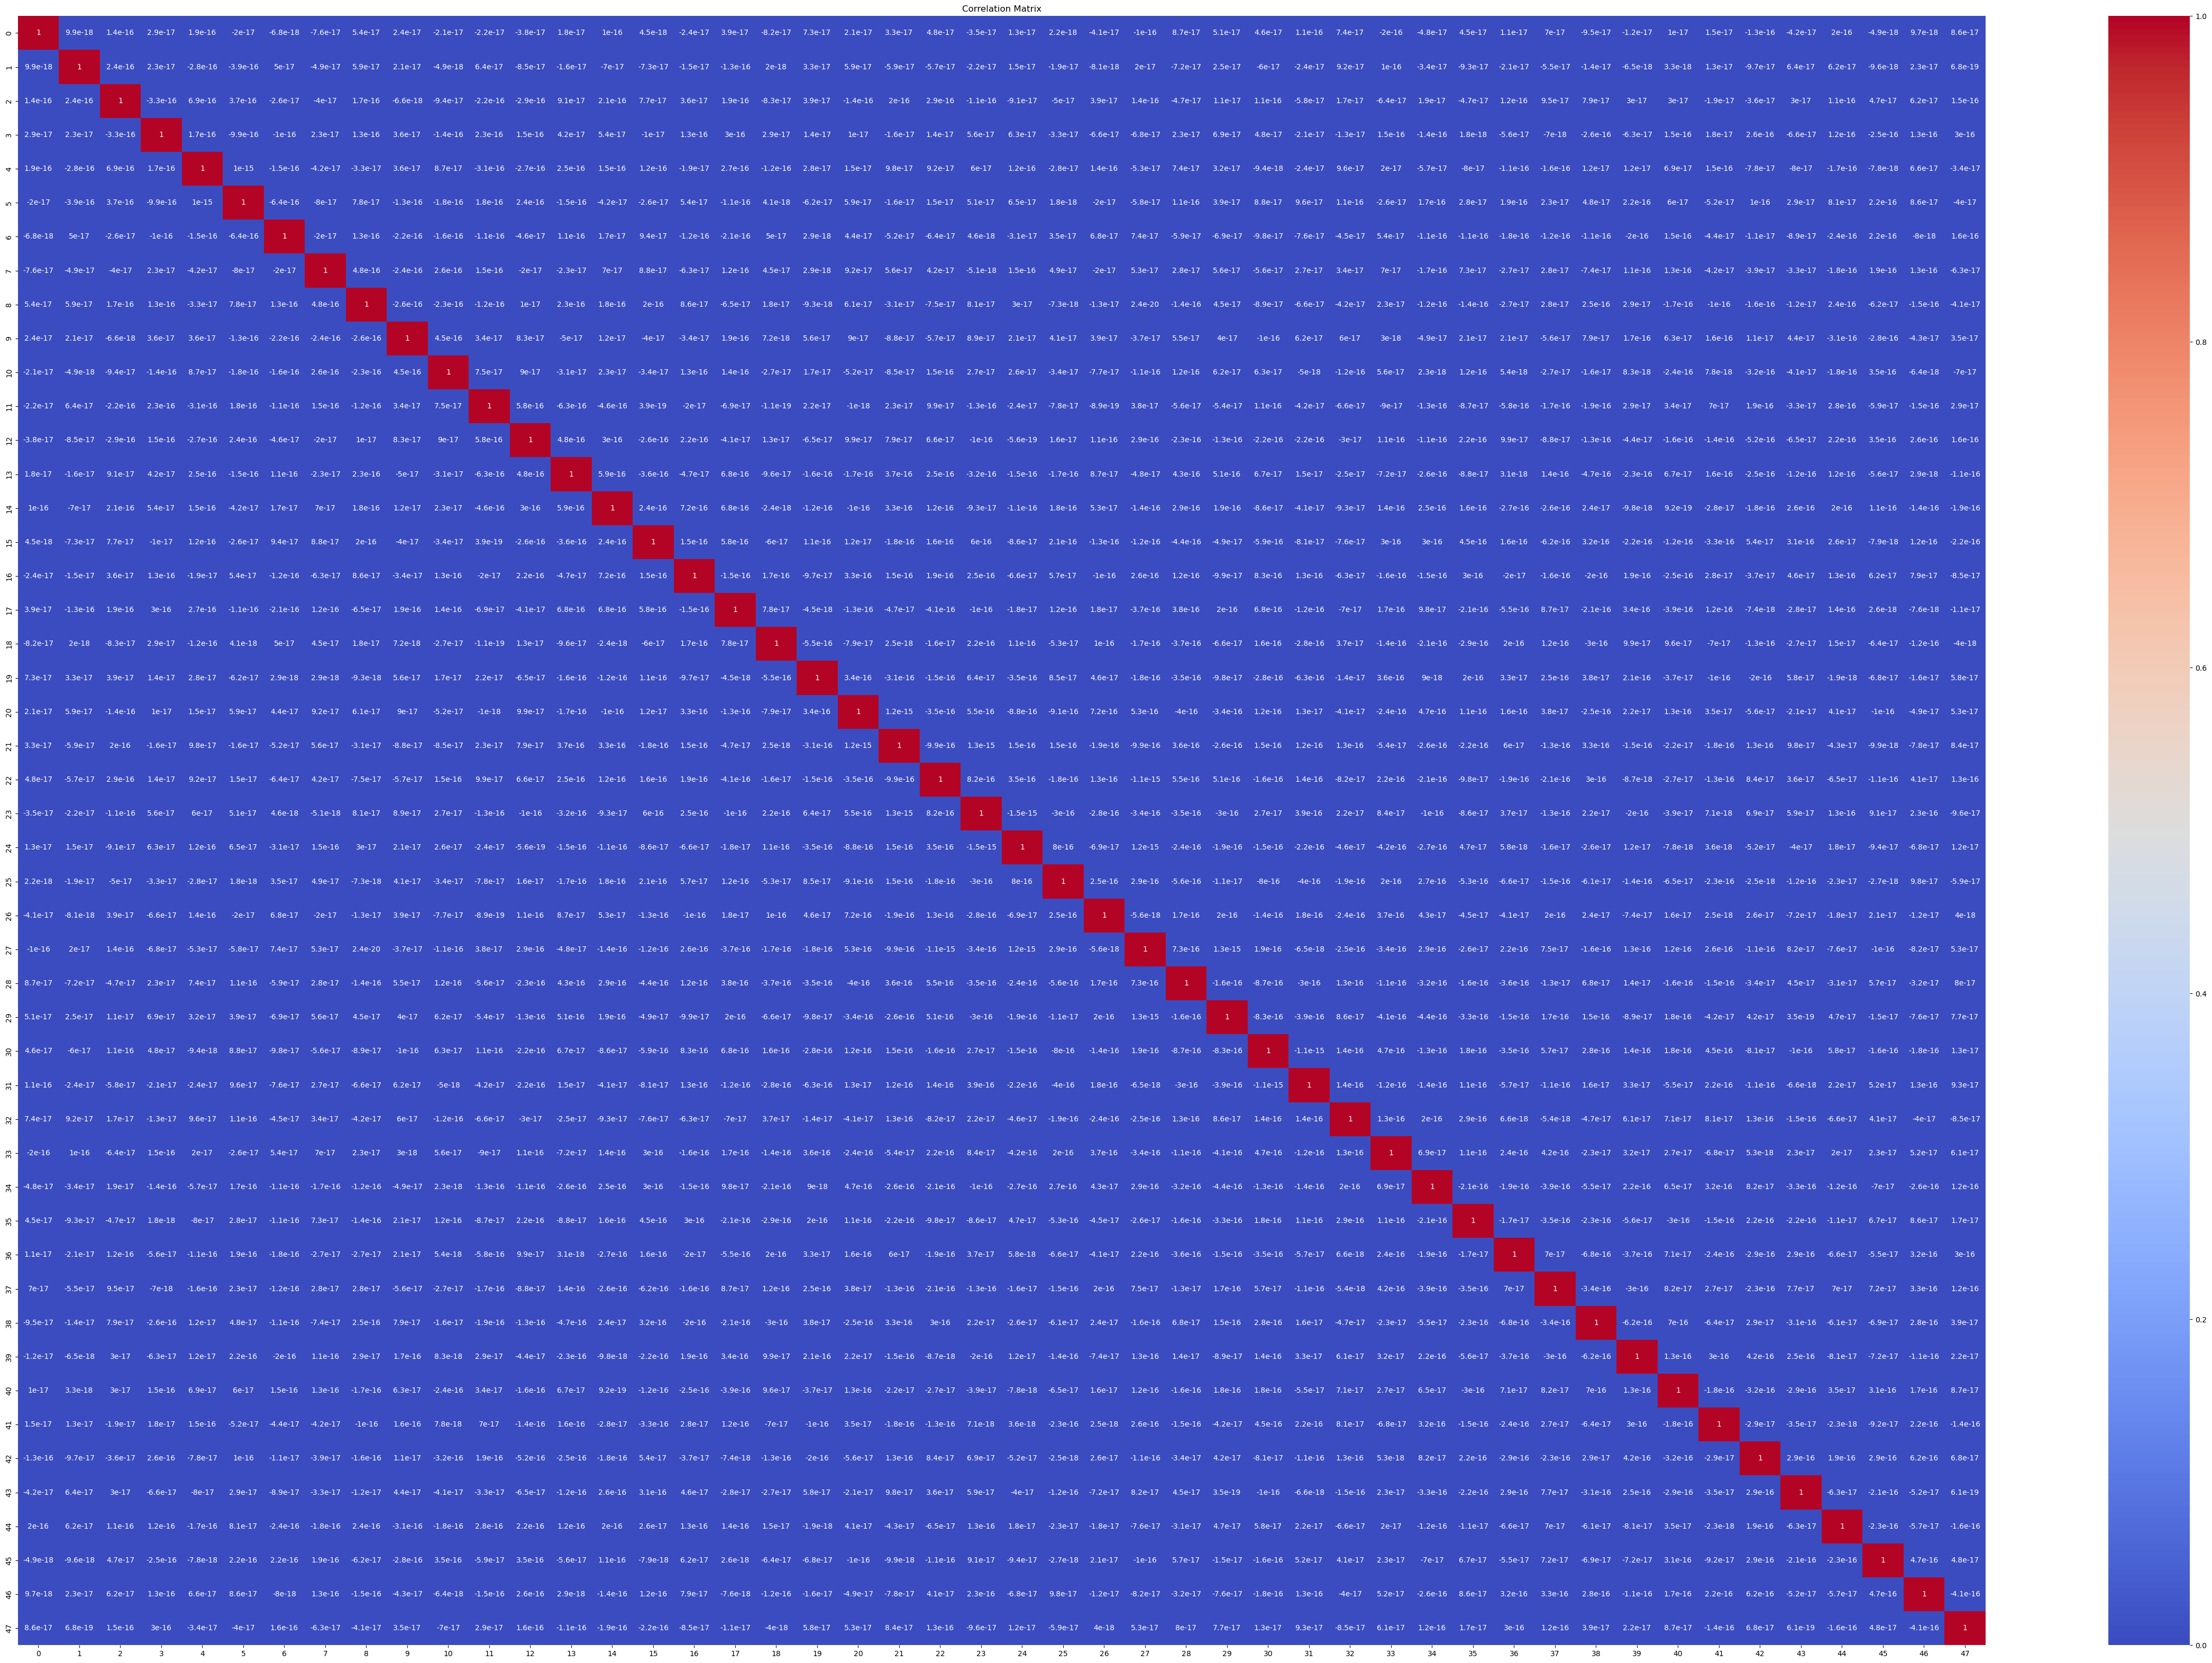

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(60, 40))
sns.heatmap(pd.DataFrame(X_train_pca).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


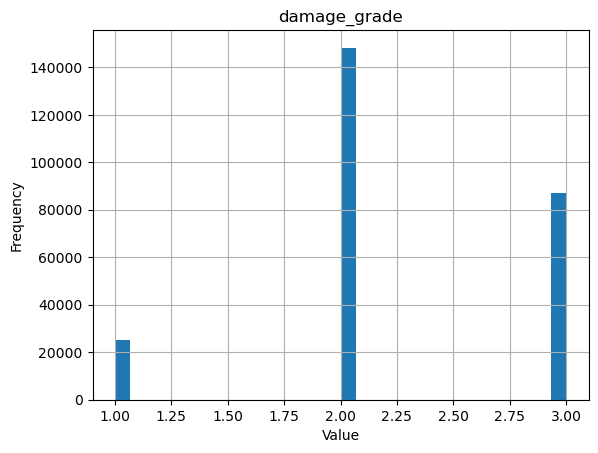

In [20]:
y_train["damage_grade"].hist(bins=30)
plt.title("damage_grade")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Assuming X_train_scaled and y_train are ready
# Split into training and validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

# Build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='sigmoid'))  # Use 'softmax' for multiclass, 'sigmoid' for multilabel

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # change loss for other tasks

# Train the model
history = model.fit(X_train_split, y_train_split, 
                    validation_data=(X_val_split, y_val_split), 
                    epochs=50, batch_size=32)

# Evaluate
loss, accuracy = model.evaluate(X_val_split, y_val_split)
print(f"Validation Loss: {loss}, Accuracy: {accuracy}")

# Predict on test data
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)  # Scale test data
y_test_pred = model.predict(X_test_scaled)


ModuleNotFoundError: No module named 'tensorflow'

In [24]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
classifier = OneVsRestClassifier(mlp)

classifier.fit(X_train_split, y_train_split)  # No need to ravel
y_val_pred = classifier.predict(X_val_split)

# F1 Score
from sklearn.metrics import f1_score
f1_macro = f1_score(y_val_split, y_val_pred, average='macro')
f1_micro = f1_score(y_val_split, y_val_pred, average='micro')

print(f"F1 Score (Macro): {f1_macro}")
print(f"F1 Score (Micro): {f1_micro}")


F1 Score (Macro): 0.612363173271043
F1 Score (Micro): 0.6795917192686249
